In [0]:
import pandas as pd

In [0]:
dtrain = pd.read_csv("/content/train.csv")

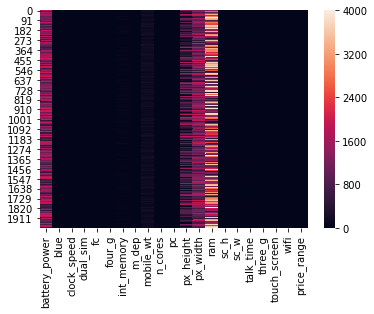

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dtrain)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X=dtrain.drop(["price_range"],axis=1)
Y=dtrain["price_range"]
xtrain,xtest,ytrain,ytest =  train_test_split(X,Y, test_size=0.3, random_state=1) 

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
accuracy_score(ytest, ypred)


0.8483333333333334

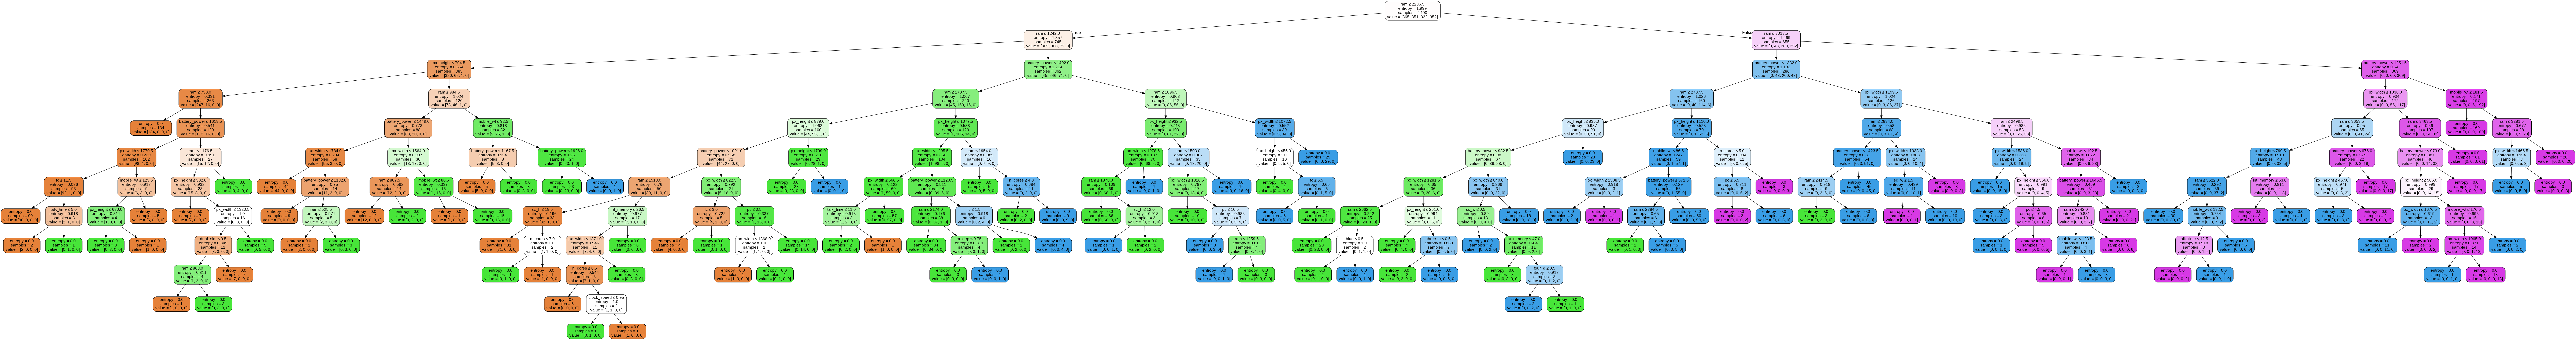

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = xtrain.columns,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
clf =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
clf = clf.fit(xtrain,ytrain)
y_pred = clf.predict(xtest)
accuracy_score(ytest, y_pred)

0.98